# Beam Analyzer
This tool analyzes simply supported beams under different loading conditions using Norton Machine Design 6e formulas.

## Case (a): Concentrated Loading
A single force $F$ applied at distance $a$ from the left support.

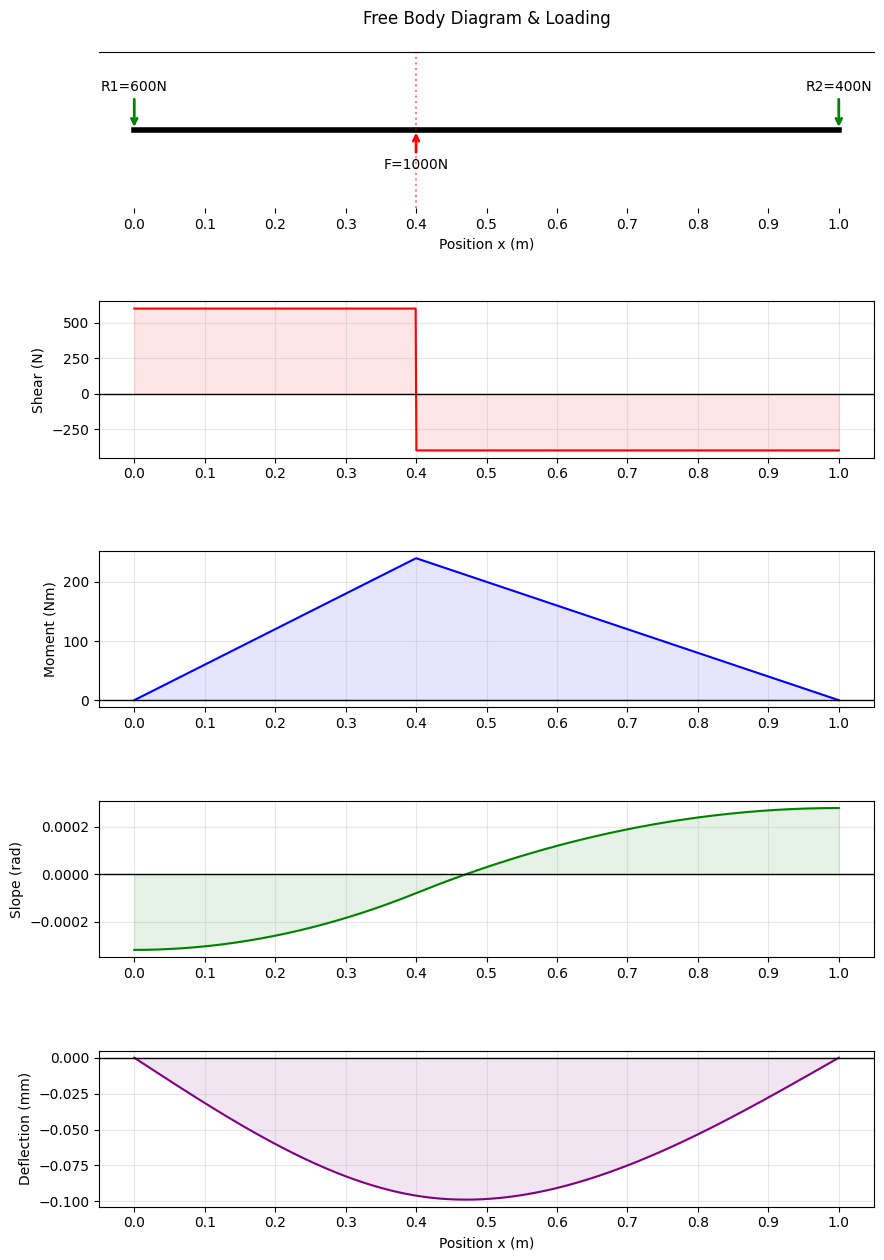

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. INPUT VALUES - Case (a)
# ==========================================
F = 1000      # Force (N)
l = 1.0       # Total length of beam (m)
a = 0.4       # Distance from left support to load (m)
E = 200e9     # Modulus of Elasticity (Pa)
I = 1e-6      # Moment of Inertia (m^4)

def macaulay(x, a, n):
    return np.where(x > a, (x - a)**n, 0.0)

x = np.linspace(0, l, 1000)
R1 = F * (1 - a/l)
R2 = F * (a/l)
V = R1 - F * macaulay(x, a, 0)
M = R1 * x - F * macaulay(x, a, 1)
const_theta = (a / (3 * l)) * (-a**2 + 3 * a * l - 2 * l**2)
theta = (F / (2 * E * I)) * ((1 - a/l) * x**2 - macaulay(x, a, 2) + const_theta)
y = (F / (6 * E * I)) * ((1 - a/l) * x**3 - macaulay(x, a, 3) + 3 * const_theta * x)

# ==========================================
# 3. PLOTTING
# ==========================================
fig, axs = plt.subplots(5, 1, figsize=(10, 15), sharex=True)
plt.subplots_adjust(hspace=0.6)

    # Ensure tick labels are visible on ALL graphs
for ax in axs:
    ax.tick_params(labelbottom=True)

# 0. Free Body Diagram (FBD)
ax = axs[0]
ax.plot([0, l], [0, 0], 'black', lw=4) # Beam
# Reactions R1 and R2
ax.annotate(f'R1={R1:.0f}N', xy=(0, 0), xytext=(0, 0.5), arrowprops=dict(arrowstyle='->', lw=2, color='green'), ha='center')
ax.annotate(f'R2={R2:.0f}N', xy=(l, 0), xytext=(l, 0.5), arrowprops=dict(arrowstyle='->', lw=2, color='green'), ha='center')
# Applied Force F
ax.annotate(f'F={F:.0f}N', xy=(a, 0), xytext=(a, -0.5), arrowprops=dict(arrowstyle='->', lw=2, color='red'), ha='center')
ax.axvline(a, color='red', linestyle=':', alpha=0.5) # Location dash
standard_ticks = np.linspace(0, l, 11)
all_ticks = np.unique(np.sort(np.append(standard_ticks, a)))
ax.set_xticks(all_ticks)
ax.set_xlabel('Position x (m)')
ax.set_ylim(-1, 1)
ax.set_title('Free Body Diagram & Loading', pad=20)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# 1. Shear
axs[1].plot(x, V, 'r'); axs[1].fill_between(x, V, color='r', alpha=0.1); axs[1].set_ylabel('Shear (N)')
axs[1].grid(True, alpha=0.3); axs[1].axhline(0, color='k', lw=1)

# 2. Moment
axs[2].plot(x, M, 'b'); axs[2].fill_between(x, M, color='b', alpha=0.1); axs[2].set_ylabel('Moment (Nm)')
axs[2].grid(True, alpha=0.3); axs[2].axhline(0, color='k', lw=1)

# 3. Slope
axs[3].plot(x, theta, 'g'); axs[3].fill_between(x, theta, color='g', alpha=0.1); axs[3].set_ylabel('Slope (rad)')
axs[3].grid(True, alpha=0.3); axs[3].axhline(0, color='k', lw=1)

# 4. Deflection
axs[4].plot(x, y*1000, 'purple'); axs[4].fill_between(x, y*1000, color='purple', alpha=0.1); axs[4].set_ylabel('Deflection (mm)')
axs[4].grid(True, alpha=0.3); axs[4].axhline(0, color='k', lw=1); axs[4].set_xlabel('Position x (m)')

# Set regular 10 increments for all physical diagrams
for ax in axs[1:]: ax.set_xticks(np.linspace(0, l, 11))

plt.show()

## Case (b): Uniformly Distributed Loading
A distributed load $w$ starting at distance $a$ and continuing to the end of the beam.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. INPUT VALUES - Case (b)
# ==========================================
w_load = 5000  # Load intensity (N/m)
l = 1.0        # Total length of beam (m)
a = 0.3        # Start of distributed load (m)
E = 200e9      # Modulus of Elasticity (Pa)
I = 1e-6       # Moment of Inertia (m^4)

def macaulay(x, a, n):
    return np.where(x > a, (x - a)**n, 0.0)

x = np.linspace(0, l, 1000)
R1 = (w_load / (2 * l)) * (l - a)**2
R2 = (w_load / (2 * l)) * (l**2 - a**2)
V = w_load * ( (1/(2*l))*(l-a)**2 - macaulay(x, a, 1) )
M = (w_load / 2) * ( (x/l)*(l-a)**2 - macaulay(x, a, 2) )
term_const = (1/l) * ( (l-a)**4 - 2*(l**2)*((l-a)**2) )
theta = (w_load / (24 * E * I)) * ( (6*(x**2)/l)*(l-a)**2 - 4*macaulay(x, a, 3) + term_const )
y = (w_load / (24 * E * I)) * ( (2*(x**3)/l)*(l-a)**2 - macaulay(x, a, 4) + (x/l)*term_const )

# ==========================================
# 3. PLOTTING
# ==========================================
fig, axs = plt.subplots(5, 1, figsize=(10, 15), sharex=True)
plt.subplots_adjust(hspace=0.6)

    # Ensure tick labels are visible on ALL graphs
for ax in axs:
    ax.tick_params(labelbottom=True)

# 0. Free Body Diagram (FBD)
ax = axs[0]
ax.plot([0, l], [0, 0], 'black', lw=4) # Beam
# Reactions R1 and R2
ax.annotate(f'R1={R1:.0f}N', xy=(0, 0), xytext=(0, 0.5), arrowprops=dict(arrowstyle='->', lw=2, color='green'), ha='center')
ax.annotate(f'R2={R2:.0f}N', xy=(l, 0), xytext=(l, 0.5), arrowprops=dict(arrowstyle='->', lw=2, color='green'), ha='center')
# Distributed Load w
ax.fill_between([a, l], [0, 0], [-0.4, -0.4], color='red', alpha=0.3)
ax.text((a+l)/2, -0.6, f'w={w_load}N/m', color='red', ha='center', fontweight='bold')
ax.axvline(a, color='red', linestyle=':', alpha=0.5) # Location dash
standard_ticks = np.linspace(0, l, 11)
all_ticks = np.unique(np.sort(np.append(standard_ticks, a)))
ax.set_xticks(all_ticks)
ax.set_xlabel('Position x (m)')
ax.set_ylim(-1, 1)
ax.set_title('Free Body Diagram & Loading Condition', pad=20)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# 1. Shear
axs[1].plot(x, V, 'r'); axs[1].fill_between(x, V, color='r', alpha=0.1); axs[1].set_ylabel('Shear (N)')
axs[1].grid(True, alpha=0.3); axs[1].axhline(0, color='k', lw=1)

# 2. Moment
axs[2].plot(x, M, 'b'); axs[2].fill_between(x, M, color='b', alpha=0.1); axs[2].set_ylabel('Moment (Nm)')
axs[2].grid(True, alpha=0.3); axs[2].axhline(0, color='k', lw=1)

# 3. Slope
axs[3].plot(x, theta, 'g'); axs[3].fill_between(x, theta, color='g', alpha=0.1); axs[3].set_ylabel('Slope (rad)')
axs[3].grid(True, alpha=0.3); axs[3].axhline(0, color='k', lw=1)

# 4. Deflection
axs[4].plot(x, y*1000, 'purple'); axs[4].fill_between(x, y*1000, color='purple', alpha=0.1); axs[4].set_ylabel('Deflection (mm)')
axs[4].grid(True, alpha=0.3); axs[4].axhline(0, color='k', lw=1); axs[4].set_xlabel('Position x (m)')

# Set regular 10 increments for all physical diagrams
for ax in axs[1:]: ax.set_xticks(np.linspace(0, l, 11))

plt.show()

IndentationError: unexpected indent (230265837.py, line 32)